**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Atividade 03:** Regressão Linear

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/atividades/2024/atividade03.ipynb)


# Regressão Linear

Nesta atividade, vamos efetuar o treinamento de um modelo de regressão linear, algo muito próximo do que fizemos em sala de aula, mas utilizando um novo banco de dados. Este notebook iniciará o processo de carregar e preparar o banco de dados, além de plotar alguns gráficos para dar maiores explicações sobre o conteúdo dos dados. Além disso, você pode achar que algum código usado neste notebook pode posteriormente ser adaptado para resolver a atividade da semana.

O banco de dados em questão foi extraído em 1974 da revista *Motor Trend US* e e mostra o consumo de combustível e 10 aspectos de projeto e de desempenho de  32 automóveis (modelos de 1973 a 1974).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [2]:
###############################################
# Motor Trend Car Road Tests
# Description
# The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
#
# Format
# A data frame with 32 observations on 11 (numeric) variables.
#
# [, 1]	mpg	Miles/(US) gallon
# [, 2]	cyl	Number of cylinders
# [, 3]	disp	Displacement (cu.in.)
# [, 4]	hp	Gross horsepower
# [, 5]	drat	Rear axle ratio
# [, 6]	wt	Weight (1000 lbs)
# [, 7]	qsec	1/4 mile time
# [, 8]	vs	Engine (0 = V-shaped, 1 = straight)
# [, 9]	am	Transmission (0 = automatic, 1 = manual)
# [,10]	gear	Number of forward gears
# [,11]	carb	Number of carburetors
###############################################

mtcars = pd.read_csv("../notebooks/data/mtcars.csv")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Posteriormente, vamos utilizar os valores mínimos e máximos de algumas das colunas para plotar os gráficos. A maneira mais fácil de obter esses valores é usando o comando *describe*, como mostrado abaixo.

In [3]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Gráficos do Banco de Dados

Vamos utilizar gráficos de pontos (*scatter plots*) para mostrar detalhes importantes do banco de dados. Para deixar as coisas mais claras, vamos personalizar o gráfico de pontos para adicionar novos elementos, como cor e tamanho dos pontos, o que vai ajudar a fornecer informações adicionais e melhorar a legibilidade dos dados.

Primeiramente, vamos plotar as variáveis *qsec* e *mpg* em um plano cartesiano. 

* A variável *qsec* corresponde ao tempo em segundos que o carro demora para percorrer 1/4 de milha em metros, algo próximo de 400 metros neste caso. 
* A variável *mpg* corresponde à distância que o carro percorre com um galão. Uma milha corresponde a $1.61$ quilômetros, e um galão corresponde a $3.78$ litros, o que ajuda a entender mais ou menos o que os valores estão dizendo.

<Axes: xlabel='qsec', ylabel='mpg'>

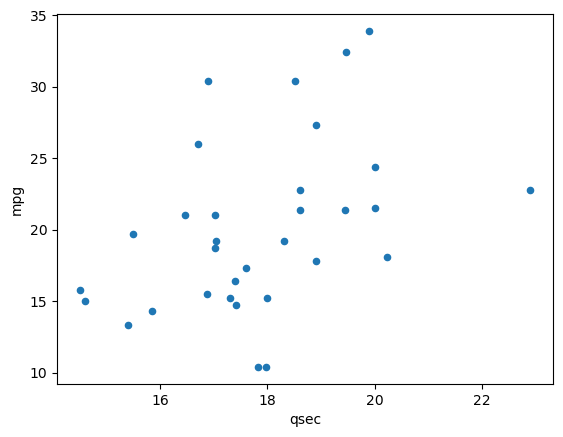

In [4]:
## Um gráfico sem personalização diz muito menos do que poderia
mtcars.plot.scatter(x = "qsec",
                    y = "mpg")

O gráfico acima não parece dizer muita coisa, dado que os pontos estão espalhados. Entretanto, é de se supor que as duas variáveis deveriam estar relacionadas se fixarmos algum modelo de carro ou analisarmos alguma propriedade. Nesse caso, vamos acrescentar novos elementos para entender a relação. 

Os carros no banco de dados possuem diferentes potências, o que interfere muito em como se comportam. O banco de dados possui carros com potências definidas em *hp* (horse power) na coluna de mesmo nome.

Colocamos agora potência do carro na cor dos pontos. Veja o gráfico gerado. Note que para podermos gerar um grupo de cores padronizadas tivemos também que configurar *vmin* e *vmax* com os valores mínimos e máximos de *hp*, respectivamente.

<Axes: xlabel='qsec', ylabel='mpg'>

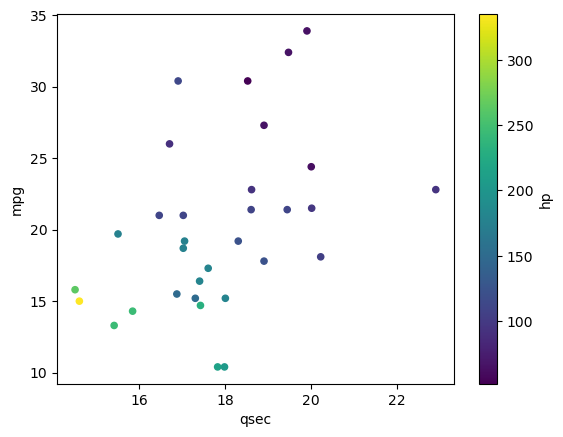

In [5]:
## Com cores podemos contar uma história diferente.
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp",
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis')

Agora já é possível ver que realmente existe uma relação entre *mpg* e *qsec* quando levamos em conta a potência. Os carros mais potentes estão agrupados no quadrante inferior esquerdo, enquanto que os carros menos potentes estão no quadrante superior direito. A potência então é um fator que interfere tanto em *mpg* quanto em *qsec*.

Um outro fator que podemos visualizar é o tamanho do motor, dado pela coluna *disp*. O tamanho está em *cu.in*, que pode ser transformado em litros, por exemplo. Vamos fazer agora com que os tamanhos dos círculos correspondam ao tamanho do motor:

<Axes: xlabel='qsec', ylabel='mpg'>

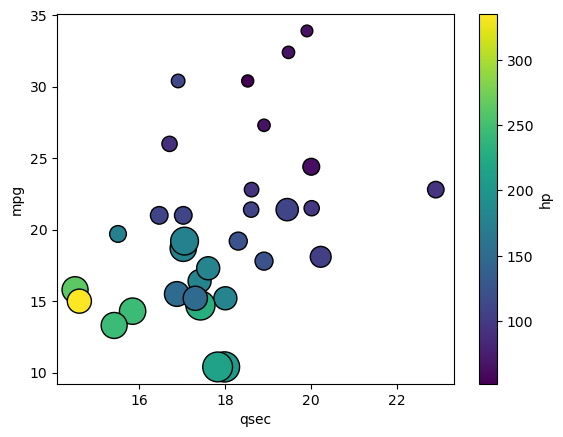

In [6]:
## Podemos ainda usar o tamanho dos pontos para
## entender melhor os dados
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp", 
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis',
                    s = "disp",
                    edgecolor = "black")

## Gráfico de um Oráculo 

Vamos supor agora que temos um oráculo que recebe valores para *qsec*, *mpg* e *disp* para devolver a potência do carro em *hp*. Um oráculo desse tipo pode criado, por exemplo, com uma regressão linear, do mesmo modo que aprendemos em sala de aula. 

Para saber se o oráculo está funcionando corretamente, podemos então analisar o seu resultado plotando os seus valores. Por exemplo, vamos assumir o oráculo de teste a seguir: 

In [ ]:
oraculo = lambda qsec, mpg, disp :  (1/qsec)*(1/mpg)*disp*175

Podemos criar um gráfico com o oráculo com esses valores para verificar se ele parece estar fazendo um bom trabalho.

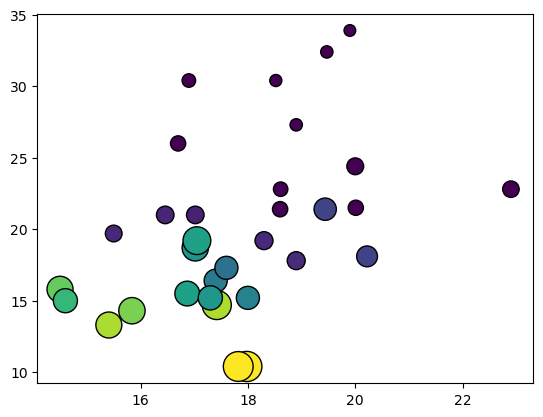

In [8]:
## Plotando o oráculo
eixo_qsec = []
eixo_mpg  = []
eixo_disp = []
eixo_hp   = []

for i, row in mtcars.iterrows() :
    qsec = row["qsec"]    
    mpg  = row["mpg"]
    disp = row["disp"]

    eixo_qsec.append(qsec)
    eixo_mpg.append(mpg)
    eixo_disp.append(disp)
    eixo_hp.append(oraculo(qsec,mpg,disp))


plt.scatter(x = eixo_qsec,
             y = eixo_mpg,
             c = eixo_hp, 
             vmin = 52, # min de hp no banco
             vmax = 335, # max de hp no banco
             cmap='viridis',
             s = eixo_disp,  
             edgecolor = "black"
        )



Comparando com o resultado abaixo, parece que nosso oráculo não está fazendo um bom trabalho, veja novamente as cores originais.

<Axes: xlabel='qsec', ylabel='mpg'>

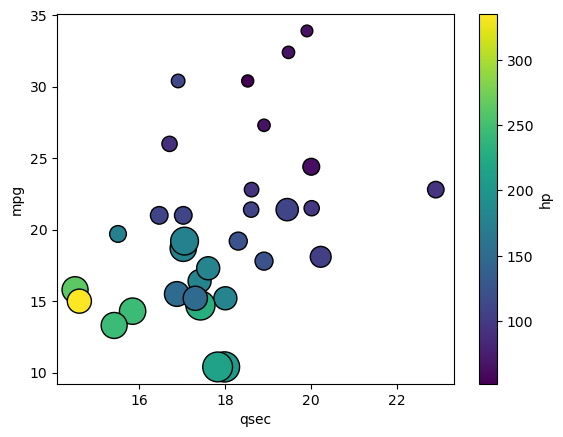

In [9]:
## Podemos ainda usar o tamanho dos pontos para
## entender melhor os dados
mtcars.plot.scatter(x = "qsec",
                    y = "mpg",
                    c = "hp", 
                    vmin = 52, # min de hp no banco
                    vmax = 335, # max de hp no banco
                    colormap='viridis',
                    s = "disp",
                    edgecolor = "black")

# Atividade

A sua função agora é criar um oráculo usando regressão linear, como visto em sala de aula. A priori, assumo que você irá configurar a sua regressão para aprender os pesos $W_1$, $W_2$, W_3$ e $W_4$ da seguinte função:

$$ f(x) = qsec * W_1   + mpg * W_2 + disp * W_3 + W_4 $$ 

Entretanto, sinta-se livre para colocar qualquer função que desejar. Após treinar o oráculo, crie um gráfico contendo os pontos do banco de dados e a resposta do seu oráculo para que seja possível fazer a análise usando as cores do gráfico, semelhante ao que geramos anteriormente para o oráculo de brinquedo arbitrário que geramos.

Ao final, você será avaliado pelo seguinte:

1. Consegue configurar o problema do mtcars em um cenário de regressão linear.
2. Consegue fazer com que os pesos sejam ajustados a cada iteração.
3. Consegue fazer com que a regressão linear convirja para algum resultado interessante.
4. Consegue fazer uma comparação usando um gráfico e suas cores.

Como ponto de partida, retiraremos as variáveis que estão no pandas e converteremos para PyTorch.

In [11]:
## Utilizando os tensores do PyTorch

y = torch.tensor(mtcars.hp.values, dtype = torch.float)
x = torch.tensor(mtcars.loc[: , ["qsec", "mpg", "disp"]].values, dtype = torch.float)

Vamos agora olhar os valores que temos disponíveis tanto em x quanto em y.

In [12]:
x

tensor([[ 16.4600,  21.0000, 160.0000],
        [ 17.0200,  21.0000, 160.0000],
        [ 18.6100,  22.8000, 108.0000],
        [ 19.4400,  21.4000, 258.0000],
        [ 17.0200,  18.7000, 360.0000],
        [ 20.2200,  18.1000, 225.0000],
        [ 15.8400,  14.3000, 360.0000],
        [ 20.0000,  24.4000, 146.7000],
        [ 22.9000,  22.8000, 140.8000],
        [ 18.3000,  19.2000, 167.6000],
        [ 18.9000,  17.8000, 167.6000],
        [ 17.4000,  16.4000, 275.8000],
        [ 17.6000,  17.3000, 275.8000],
        [ 18.0000,  15.2000, 275.8000],
        [ 17.9800,  10.4000, 472.0000],
        [ 17.8200,  10.4000, 460.0000],
        [ 17.4200,  14.7000, 440.0000],
        [ 19.4700,  32.4000,  78.7000],
        [ 18.5200,  30.4000,  75.7000],
        [ 19.9000,  33.9000,  71.1000],
        [ 20.0100,  21.5000, 120.1000],
        [ 16.8700,  15.5000, 318.0000],
        [ 17.3000,  15.2000, 304.0000],
        [ 15.4100,  13.3000, 350.0000],
        [ 17.0500,  19.2000, 400.0000],


In [16]:
y

tensor([110., 110.,  93., 110., 175., 105., 245.,  62.,  95., 123., 123., 180.,
        180., 180., 205., 215., 230.,  66.,  52.,  65.,  97., 150., 150., 245.,
        175.,  66.,  91., 113., 264., 175., 335., 109.])

Agora começa a parte divertida. Os blocos a seguir podem lhe servir como guia para obter um resultado interessante. Em cada bloco, coloque os códigos apropriados, usando o que foi visto na Aula 03 como guia.

In [ ]:
## Crie a variável xx normalizando os valores de x entre 0 e 1.

## Observe que no código visto na aula 03, tomamos um certo cuidado em 
## garantir que não haveria divisão por zero fazendo: 

## minimo[0] = 0

## Entretanto, aqui, a primeira linha NÃO TEM TODOS OS VALORES IGUAIS. 
## Nesse caso, o código acima é desnecessário.
xx = None

In [ ]:
## Adicione em xx uma nova coluna com valores iguais 1. 
## Isso fará com que cada linha da matriz possua quatro 
## valores: 1, qsec, mpg, disp.

## Você pode executar esse passo facilmente usando o 
## comando torch.cat visto em sala de aula.

In [ ]:
## Crie um vetor de coeficientes para multiplicar pela variável xx.
## O seu vetor de coeficientes deve ter tamanho 4 e deverá configurar
## requires_grad como True. 

coef = None

In [ ]:
## Inicialize a função de erro MSELoss
loss_fn = None

In [ ]:
## Execute o Treinamento

## ToDo: Configure as duas linhas abaixo como achar apropriado
max_learning_rate = 0.5
epochs = 1000000

for t in range(epochs):
    learning_rate = max_learning_rate * (1 - t/epochs)

    # ToDo Forward pass: Use o produto interno entre xx e 
    # coef para gerar uma predição..
    y_pred = None

    ## Computando o erro com a função de custo 
    ## imprimindo o resultado algumas vezes na tela
    ## para ver se está funcionando.
    loss = loss_fn(y_pred, y)
        
    ## Imprimindo dez vezes o resultado do erro
    if t % (epochs / 10) == 0 :
        print(t, loss.item())

    ## Computando os gradientes
    loss.backward()

    # Atualizando os pesos usando a descida por gradiente.
    coef.data -= learning_rate * coef.grad.data
    
    # Limpando os gradientes antes da próxima iteração
    coef.grad.data.zero_()



Se tudo tiver dado certo nos passos acima, você deverá finalizar plotando um gráfico de pontos colorindo as bolinhas que representam os carros. Neste mesmo notebook tem um código que pode ser copiado e colado no bloco a seguir e alterado para corresponder ao seu oráculo. 

Não esqueça que, se no seu oráculo você usou uma normalização por máximo e mínimo, a mesma operação deve ser usada no bloco a seguir que você irá construir.

Ao final de tudo, não esqueça de dar uma opinião pessoal sobre o desempenho do seu modelo. Você acha que ele é um bom oráculo ou ele é meia-boca?